## Visualize and clusterize the data in the file x_12d.dat (N=600 samples, L=12 dimensions), which also has labels for checking the performances (y_12d.dat)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

### 1. “eps” (ε) and “minPts” (mP) in DBSCAN algorithm for clustering

Refine the grid with more values of ε and mP and plot a heat-map
showing the normalized mutual information (NMI) between true and
predicted clusters, similar to the one on the right.

Is the high NMI region showing a correlation between ε and mP?

The plots of ranked distances to the i-th neighbor might help choose
the ε for a given i=mP. How does the optimal value for ε given mP
relate to the ranked distances to the mP-th neighbor?

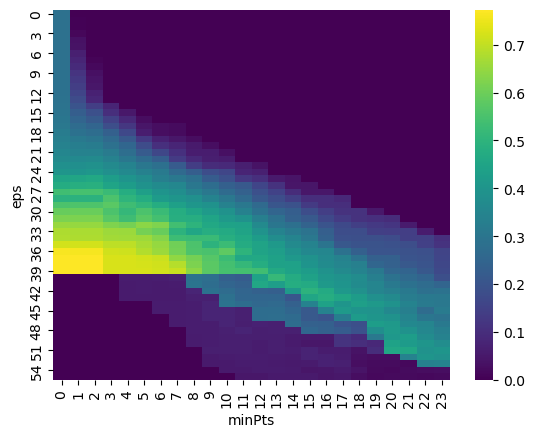

In [2]:
path = '/home/gabriele/ex3_lcpb/DATA/'
x = np.loadtxt(path + 'x_12d.dat')
label = np.loadtxt(path + 'y_12d.dat')

eps_values = np.arange(70,350,5)
minPts_values = np.arange(1,25)
nmi_values = []

for eps in eps_values:
    for minPts in minPts_values:
        db = DBSCAN(eps=eps, min_samples=minPts)
        pred = db.fit_predict(x)
        nmi = normalized_mutual_info_score(label, pred)
        nmi_values.append((eps, minPts, nmi))


nmi_matrix = np.array([[nmi for eps, mP, nmi in nmi_values if eps == eps_val]
                       for eps_val in eps_values])

heatmap =sns.heatmap(nmi_matrix, cmap="viridis")
plt.xlabel('minPts')
plt.ylabel('eps')
plt.show()

In [3]:
print(label)

[1. 0. 2. 0. 0. 1. 2. 2. 2. 0. 0. 0. 1. 0. 2. 2. 2. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2. 1. 0. 0. 1. 0. 0. 2. 1. 1. 0. 2. 2.
 1. 1. 0. 2. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 2. 1. 2. 0. 1. 0. 0. 2. 0. 1.
 1. 1. 1. 0. 1. 2. 1. 2. 0. 1. 0. 2. 1. 1. 1. 1. 2. 1. 2. 0. 0. 1. 2. 1.
 1. 2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 1. 0. 0. 0. 2. 2. 1. 2. 1. 0. 0. 1. 2.
 0. 1. 2. 0. 1. 1. 2. 2. 0. 1. 0. 2. 0. 0. 1. 0. 1. 0. 2. 0. 2. 1. 0. 1.
 0. 2. 0. 1. 0. 1. 0. 0. 1. 0. 1. 2. 2. 1. 0. 1. 1. 0. 2. 0. 2. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 2. 2. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 2. 1.
 1. 2. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 2. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 2. 1. 1. 1. 1. 1. 0. 2. 0. 0. 0. 0. 1. 1.
 2. 0. 0. 0. 0. 1. 1. 1. 2. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 2. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 0. 0. 1. 0. 0.
 0. 0. 1. 2. 0. 2. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 2. 1. 0. 0. 1.
 2. 2. 0. 2. 1. 1. 0. 1. 2. 1. 0. 1. 0. 0. 0. 0. 1.

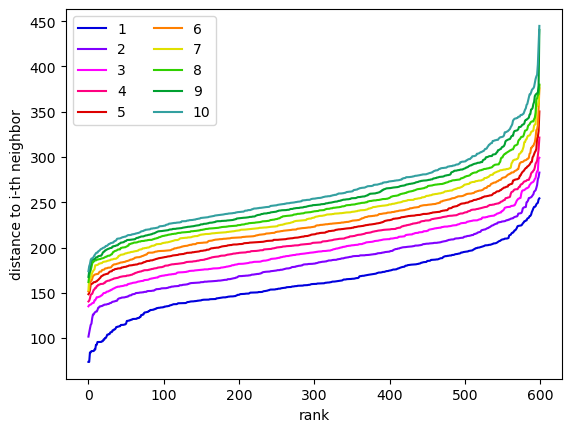

mean minimum distance between points:  162.34622464324366


In [16]:
nn = 10
nbrs = NearestNeighbors(n_neighbors=nn+1).fit(x) #, algorithm='ball_tree'
d, ind = nbrs.kneighbors(x)
dd=d.T
# note: dd[0] has a trivial set of zeros
listc= ["#0000DD","#8000FF","#FF00FF","#FF0080","#DD0000",
        "#FF8000","#E0E000","#30D000","#00A030","#33A0A0"]
for i in range(1,nn+1):
    plt.plot(np.sort(dd[i]),c=listc[i-1],label=str(i))
    plt.xlabel("rank")
    plt.ylabel("distance to i-th neighbor")
plt.legend(ncol=2)
plt.show()
mean_min_dist = np.mean(dd[1])
print("mean minimum distance between points: ",mean_min_dist)

### 2. Understanding the 12-dimensional data
    
Use the principal component analysis (PCA) to visualize the first components of the data.
Does it help understand its structure?

In [41]:
features = np.arange(1,13)
df_x = pd.DataFrame(standardized_data, columns=features)
#plots = sns.pairplot(df_x)

In [42]:
df_x

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.405656,0.545283,-0.738290,-0.897148,-0.533442,-0.442731,-1.200812,-0.107464,0.527320,-0.444542,0.400215,-0.525417
1,1.536225,-1.300011,0.859137,-1.018885,-1.820382,-0.605589,0.120529,-0.939768,0.003524,-0.431952,1.027030,-0.885716
2,1.205138,-1.405285,1.236747,0.677081,-0.748412,-0.126919,1.264994,-1.573031,-1.456222,0.439780,-0.382878,0.222076
3,1.048278,0.369528,-0.720607,-1.442771,-1.389322,-0.827645,-0.873154,0.158576,0.139453,-1.041188,1.911985,-1.596162
4,1.718365,-0.870662,1.306407,-0.436340,-1.758162,-0.598367,0.185689,-1.665605,-0.005985,-0.129705,1.850406,-1.023004
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.541773,0.792848,-1.468196,-1.465139,-0.766074,-1.972418,-1.188958,0.689466,0.298365,-1.288709,1.126563,-1.707944
596,0.622893,0.480256,-0.360662,-0.973090,-0.617623,-0.576041,-0.910961,-0.492547,0.523629,-0.202971,0.362808,-1.249548
597,-0.334442,-0.650599,0.310956,0.498839,0.383572,0.762825,0.027824,-0.116867,0.666469,0.410133,-0.740315,0.425426
598,-0.867901,1.792931,-1.381635,-0.629568,0.734748,-0.280205,-1.339067,1.850599,0.342598,-1.066207,-0.171214,-0.090763


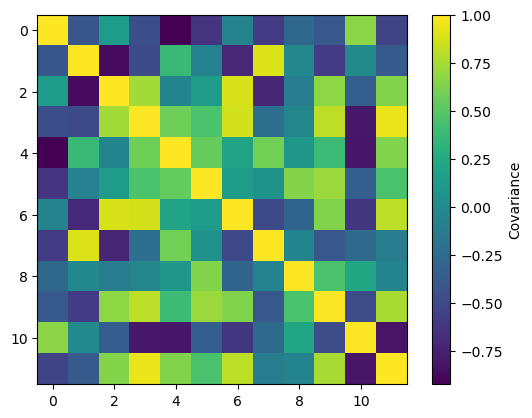

In [46]:
def standardize(data):
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized_data = (data - data_mean ) / data_std
    return standardized_data

standardized_data = standardize(x)
cov_matrix = np.cov(standardized_data.T)
plt.imshow(cov_matrix, cmap='viridis')
plt.colorbar(label='Covariance')
plt.show()

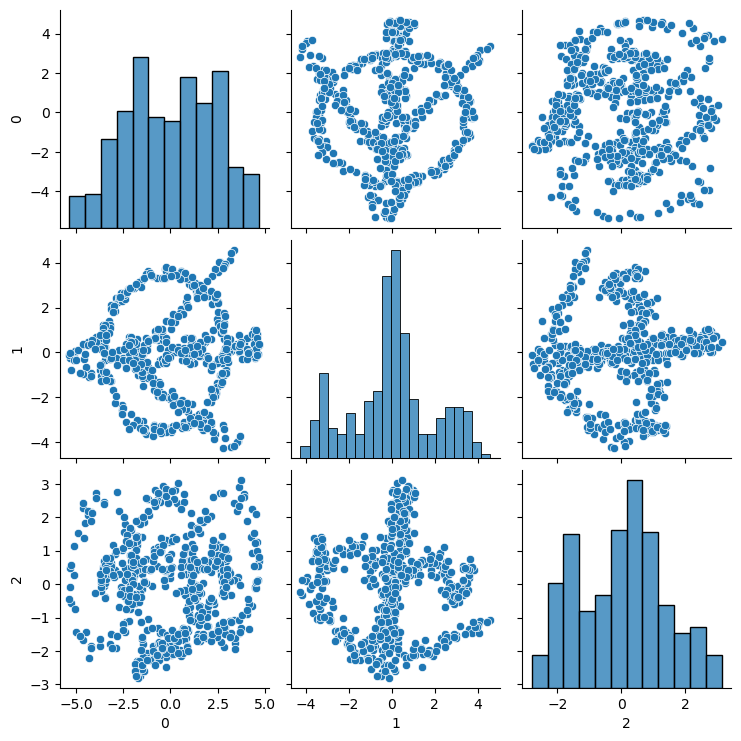

In [28]:
reduced = PCA(n_components=3).fit_transform(standardized_data)
reduced_df = pd.DataFrame(reduced)
sns.pairplot(reduced_df)

### 3. Compare with k-means

Perform a k-means clustering of the data, with k=3. Does it work better than DBSCAN?
Why?

In [32]:
kmeans = KMeans(n_clusters=2)
cluster_centers = kmeans.fit_predict(standardized_data)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

### 4. OPTIONAL: Compare with hierarchical clustering
Perform a hierarchical clustering of the data and plot the corresponding dendrogram. Does it
work better than DBSCAN? Which measure did you use for distance (distance of closest
points between clusters, distance between cluster centers, …)? Does it affect the result?

### 5. OPTIONAL: Visualize the data with other methods from the scikit package